## 3.1 Coding Question

(32, 32, 8)
(32, 32, 8)
(32, 32, 8)
(32, 32, 8)
(32, 32, 8)
(32, 32, 8)
(32, 32, 8)
(32, 32, 8)
(32, 32, 8)
(32, 32, 8)


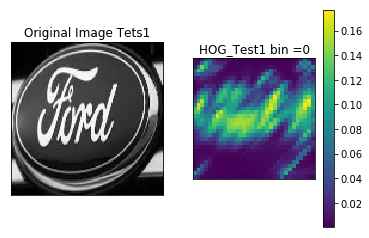

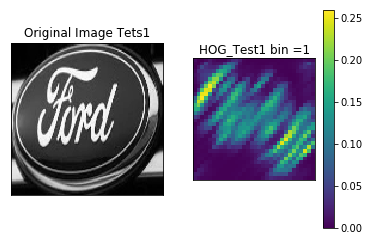

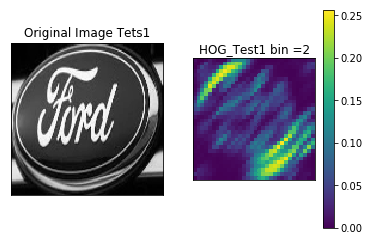

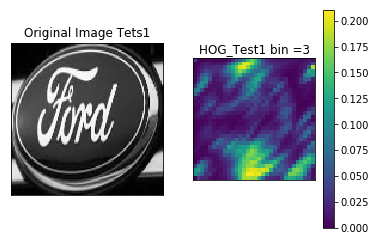

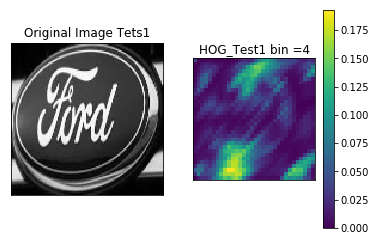

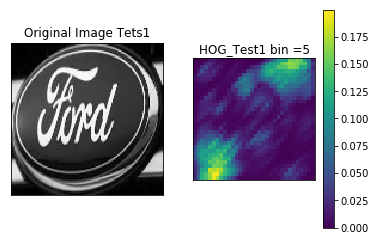

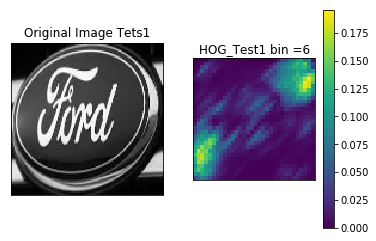

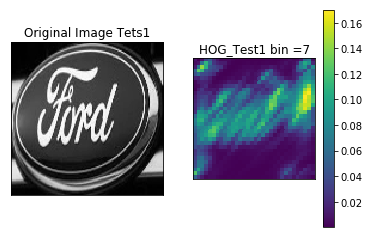

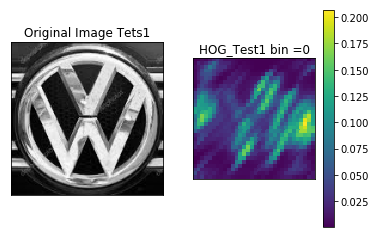

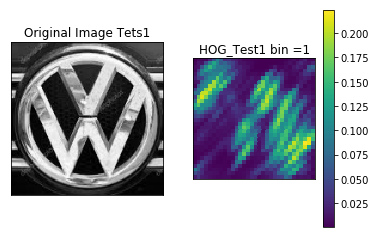

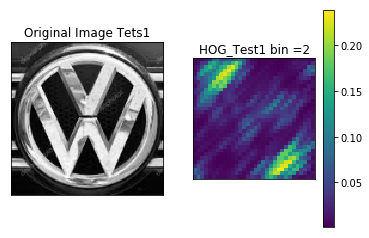

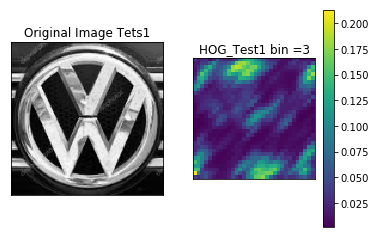

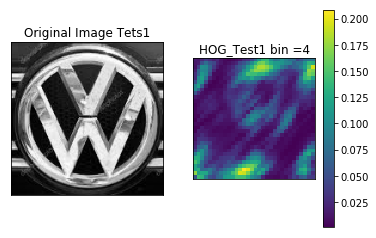

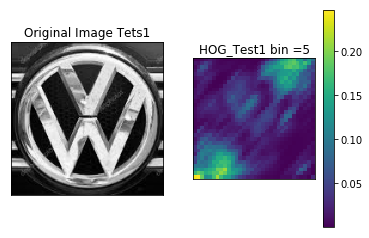

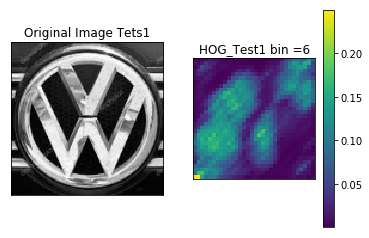

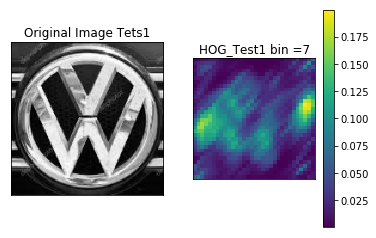

[ 1 -1]


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Creat a function that takes list of images as input
def getHoG(image_list):
    cell_size = (4, 4)  # h x w in pixels
    block_size = (4, 4)  # h x w in cells
    nbins = 8  # number of orientation bins
    hog_feature = []
    for element in image_list:
        hog = cv2.HOGDescriptor(_winSize=(element.shape[1] // cell_size[1] * cell_size[1],
                                  element.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)
        n_cells = (element.shape[0] // cell_size[0], element.shape[1] // cell_size[1])
    
        hog_feats = hog.compute(element)\
                   .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
                   .transpose((1, 0, 2, 3, 4))  # index blocks by rows first 
    
        gradients = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
        cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)
    
        for off_y in range(block_size[0]):
            for off_x in range(block_size[1]):
                gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                      off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                hog_feats[:, :, off_y, off_x, :]
                cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                       off_x:n_cells[1] - block_size[1] + off_x + 1] += 1 
        gradients /= cell_count
        hog_feature.append(gradients) 
    return hog_feature
       

#--------------------------------------Train------------------------------------------
#1. resize the training images
img_ford1 = cv2.cvtColor(cv2.imread("./dataset/ford_train1.jpeg"), cv2.COLOR_BGR2GRAY)
img_ford1 = cv2.resize(img_ford1, (128, 128))
img_ford2 = cv2.cvtColor(cv2.imread("./dataset/ford_train2.jpeg"), cv2.COLOR_BGR2GRAY)
img_ford2 = cv2.resize(img_ford2, (128, 128))
img_ford3 = cv2.cvtColor(cv2.imread("./dataset/ford_train3.jpeg"), cv2.COLOR_BGR2GRAY)
img_ford3 = cv2.resize(img_ford3, (128, 128))
img_ford4 = cv2.cvtColor(cv2.imread("./dataset/ford_train4.png"), cv2.COLOR_BGR2GRAY)
img_ford4 = cv2.resize(img_ford4, (128, 128))
img_ford5 = cv2.cvtColor(cv2.imread("./dataset/ford_train5.jpeg"), cv2.COLOR_BGR2GRAY)
img_ford5 = cv2.resize(img_ford5, (128, 128))
img_volks1 = cv2.cvtColor(cv2.imread("./dataset/volks_train1.png"), cv2.COLOR_BGR2GRAY)
img_volks1 = cv2.resize(img_volks1, (128, 128))
img_volks2 = cv2.cvtColor(cv2.imread("./dataset/volks_train2.jpeg"), cv2.COLOR_BGR2GRAY)
img_volks2 = cv2.resize(img_volks2, (128, 128))
img_volks3 = cv2.cvtColor(cv2.imread("./dataset/volks_train3.jpeg"), cv2.COLOR_BGR2GRAY)
img_volks3 = cv2.resize(img_volks3, (128, 128))
img_volks4 = cv2.cvtColor(cv2.imread("./dataset/volks_train4.jpeg"), cv2.COLOR_BGR2GRAY)
img_volks4 = cv2.resize(img_volks4, (128, 128))
img_volks5 = cv2.cvtColor(cv2.imread("./dataset/volks_train5.jpeg"), cv2.COLOR_BGR2GRAY)
img_volks5 = cv2.resize(img_volks5, (128, 128))
image_training = [img_ford1, img_ford2, img_ford3, img_ford4, img_ford5, img_volks1, img_volks2, img_volks3, img_volks4, img_volks5]

class_label = [1, 1, 1, 1, 1, -1, -1, -1, -1, -1]

#2. get HoG features of size (32, 32, 8)
hog_feature = getHoG(image_training)

#3. reshape the hog_feature to get an 2D array
for i in range (len(hog_feature)):
    print(hog_feature[i].shape)
    hog_feature[i] = np.reshape(hog_feature[i], hog_feature[i].size)

# classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(hog_feature, class_label)
#--------------------------------------END of Train------------------------------------------

#--------------------------------------TESTING------------------------------------------
#1. Resize test image to 128 x 128
img_test1 = cv2.cvtColor(cv2.imread("./dataset/ford_test.jpeg"), cv2.COLOR_BGR2GRAY)
img_test1 = cv2.resize(img_test1, (128, 128))
img_test2 = cv2.cvtColor(cv2.imread("./dataset/volks_test.jpeg"), cv2.COLOR_BGR2GRAY)
img_test2 = cv2.resize(img_test2, (128, 128))

image_test = [img_test1, img_test2]

#2. Compute HoG features 
hog_test = getHoG(image_test)
#3. Display the features for both test images
for j in range (0, 2, 1):
    for i in range (0, 8, 1):
        plt.subplot(121)
        plt.imshow(image_test[j], cmap='gray')
        plt.title("Original Image Tets1"), plt.xticks([]), plt.yticks([])
    
        s = str(i)
        bin = i  # angle is 360 / nbins * direction
        plt.subplot(122)
        plt.pcolor(hog_test[j][:, :, bin])
        plt.gca().invert_yaxis()
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title("HOG_Test1 bin =" + s), plt.xticks([]), plt.yticks([])
        plt.colorbar()
        plt.show()
    
#4. Classification
gradients_test1 = np.reshape(hog_test[0], hog_test[0].size)
gradients_test2 = np.reshape(hog_test[1], hog_test[1].size)
# test = [gradients_test2, gradients_test1]
# pred = knn.predict(test)
# print (pred) # SHould be [-1 1]

test = [gradients_test1, gradients_test2]
pred = knn.predict(test)
print (pred) # SHould be [1 -1]

## 3.2 Reasoning Question

3.2.1 Will HoG work if images of logos undergo random rotation? If yes, which property of HoG avails this feature? If not, discuss the sequence of computer vision technique(s) that can be used in order to regain uniform
orientation of the logos.

Answer: If the image has been rotated, the HoG technique will not work. As the HoG method is based on the orientation of the gradients computed from the original image, and if the image is rotated, the direction of the image gradients will not remain the same. In order to achieve the HoG with rotation, the method used in SIFT that deals with the rotation problem will fix the issue.

3.2.2 Consider that you are given a large dataset with three types of images: variable sized squares with either or both diagonals drawn (see Figure 3). How many and which directions of the gradient are sufficient in order to correctly classify the images into three categories?

Answer: 2 directions. One is 45 degree and the other is 135 degree. 